# **Resume Screening using Natural Language Processing**

Dataset: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring Warnings
import warnings 
warnings.filterwarnings('ignore')

# Machine Learning 
from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Projects/Resume Screening')
!ls

UpdatedResumeDataSet.csv


In [ ]:
df=pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
category=df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


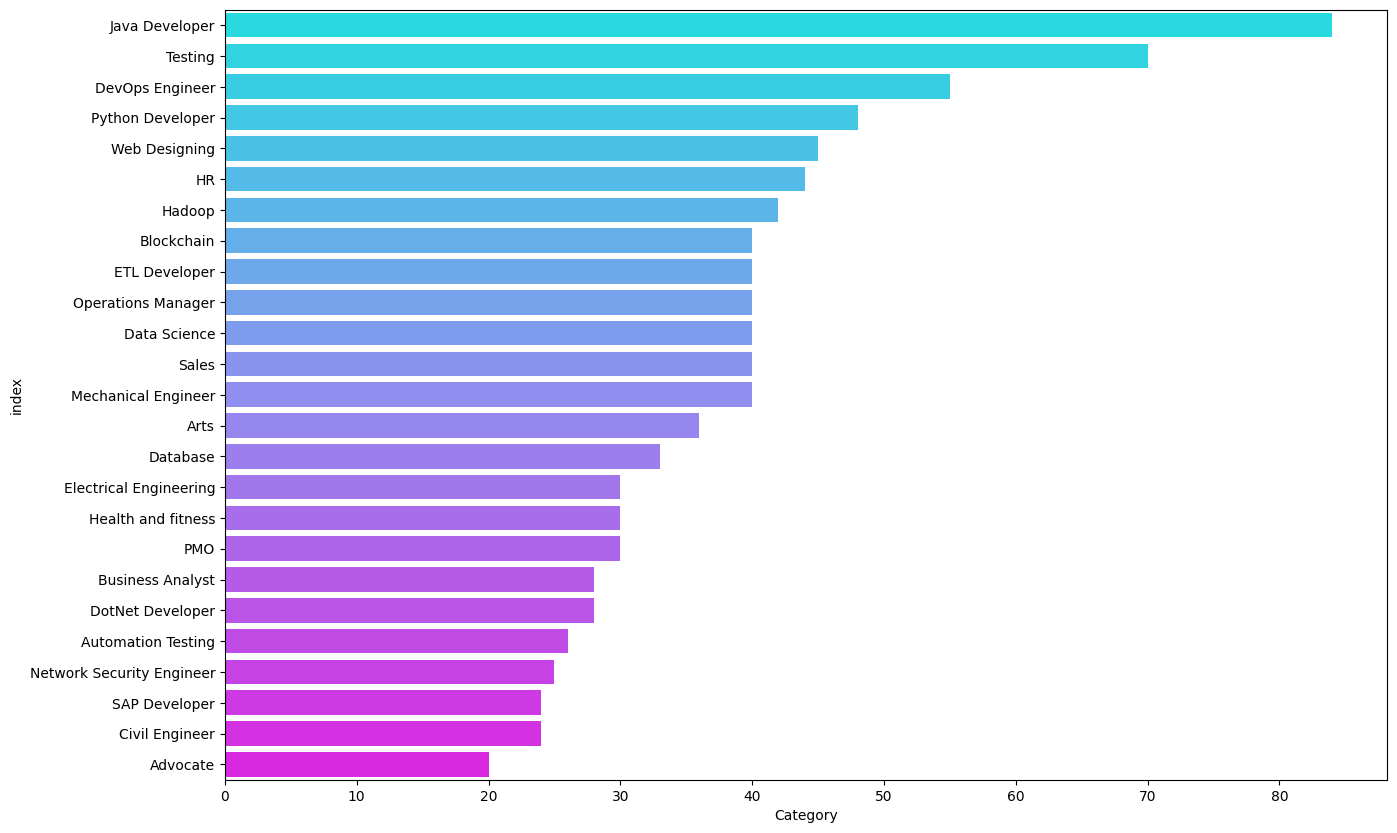

In [ ]:
# Distribution of Categories
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=category['Category'], y=category['index'],palette='cool')
plt.show()

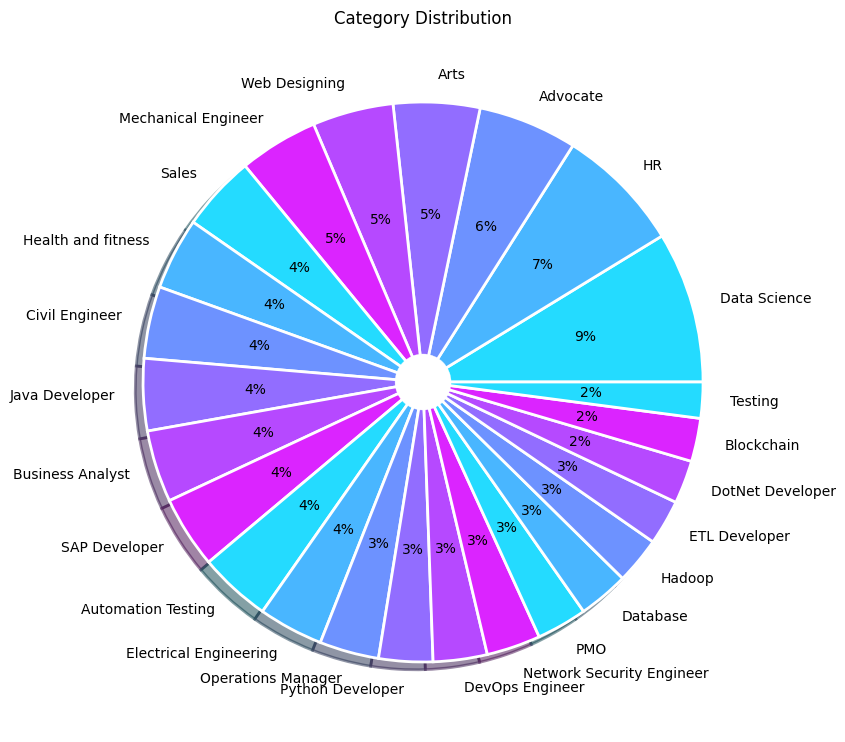

In [ ]:
# Pie chart for Categories
from matplotlib.gridspec import GridSpec
counts=df['Category'].value_counts()
labels=df['Category'].unique()

plt.figure(1,figsize=(20,20))
the_grid=GridSpec(2,2)

# To add white lines inbetween
wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

plt.subplot(the_grid[0,1], aspect=1, title='Category Distribution')

source_pie=plt.pie(counts, labels=labels,colors=sns.color_palette('cool'), autopct='%0.0f%%', shadow=True, wedgeprops=wedgeprops)

# To add circle in the middle
center_circle = plt.Circle((0, 0), 0.1, color='white', fc='white', linewidth=0.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)


plt.show()

## Data Pre-Processing

In [ ]:
import re
def Clean_Resume(resume_text):
  resume_text = re.sub('http\S+\s*',' ', resume_text) # remove URLs
  resume_text = re.sub('RT|cc',' ', resume_text) # remove RT and cc
  resume_text = re.sub('#\S+','', resume_text) # remove hashtags
  resume_text = re.sub('@\S+','  ', resume_text) # remove mentions
  resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<>=?@[]\^_`~{}|"""),' ', resume_text) # remove Punctuations
  resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
  resume_text = re.sub('\s+',' ', resume_text) # remove extra whitespace
  return resume_text 
  

In [ ]:
df['cleaned']=df['Resume'].apply(lambda x:Clean_Resume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')  # configuring packages

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# importing stopwords
from nltk.corpus import stopwords 

In [ ]:
# unzipping stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
punctuations=string.punctuation

In [ ]:
# Removing stopwords from sentences and removing punctuations
stopwords_set=set(stopwords.words('english')+['``',"''"])
words_total=[]
sentences=df['Resume'].values
clean_sentences=""

for records in sentences:
  cleaned_text = Clean_Resume(records)
  clean_sentences += cleaned_text
  required_words=nltk.word_tokenize(cleaned_text)

  for word in required_words:
    if word not in stopwords_set and word not in punctuations:
      words_total.append(word)

word_freq_dist = nltk.FreqDist(words_total)
mostcommon = word_freq_dist.most_common(50)
print(mostcommon)



[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

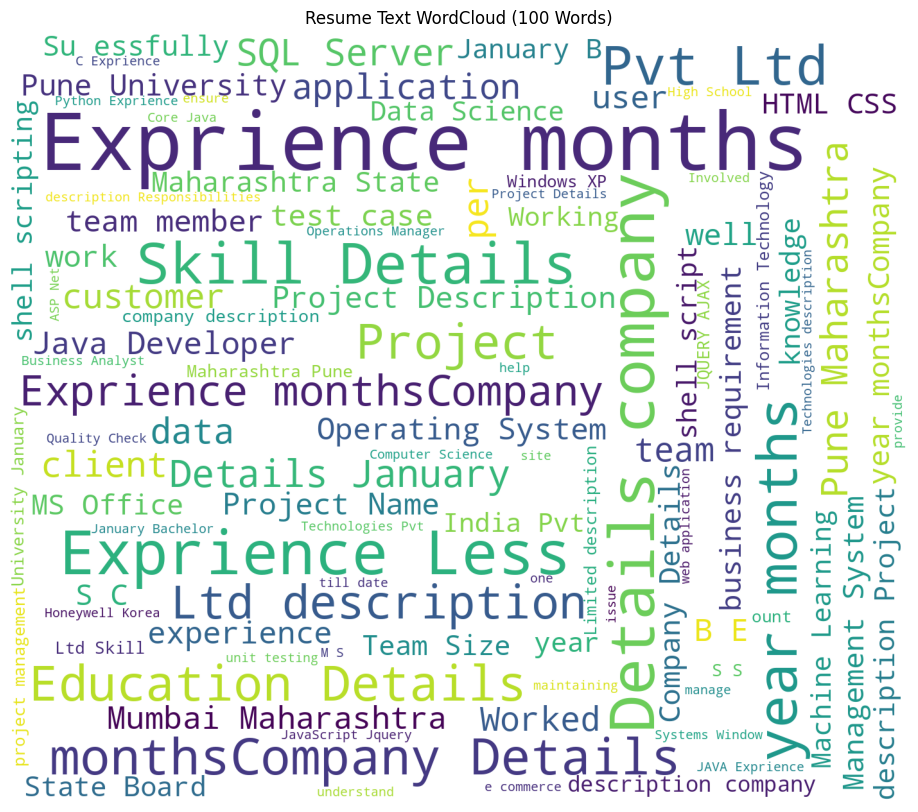

In [ ]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(clean_sentences)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()
     

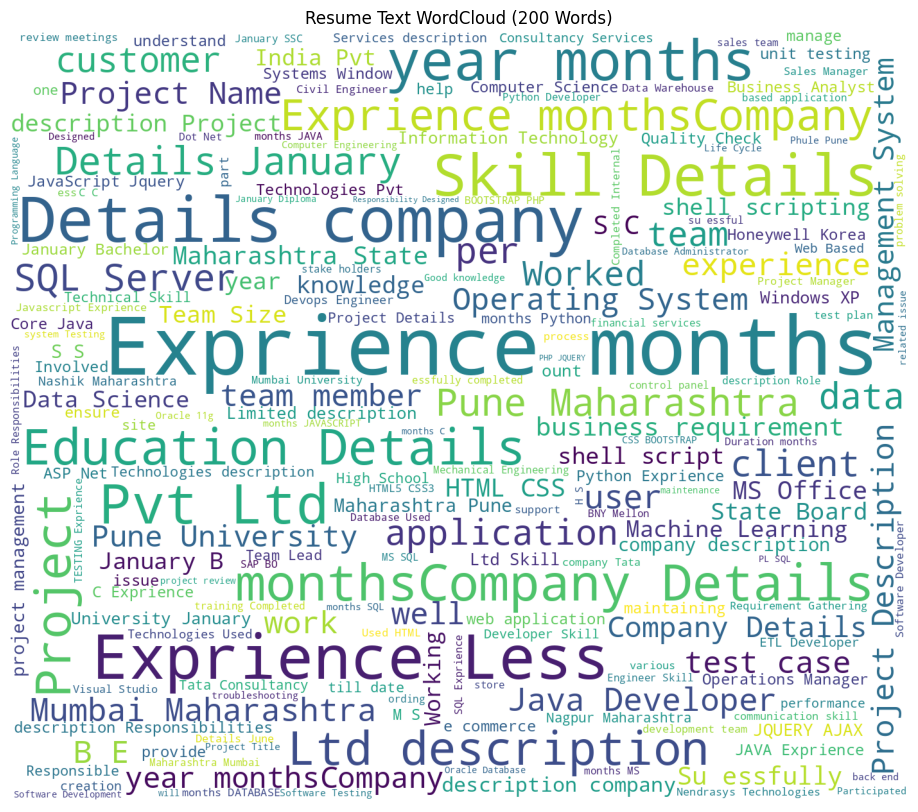

In [ ]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(clean_sentences)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()
     

In [ ]:
# Creating copy before lable encoding
dfc=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod=['Category']
le=LabelEncoder()

for i in var_mod:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [ ]:
category_num = df.Category.value_counts().to_frame().reset_index()
category_num.columns = ['value','count']
print(category_num)

    value  count
0      15     84
1      23     70
2       8     55
3      20     48
4      24     45
5      12     44
6      13     42
7       3     40
8      10     40
9      18     40
10      6     40
11     22     40
12     16     40
13      1     36
14      7     33
15     11     30
16     14     30
17     19     30
18      4     28
19      9     28
20      2     26
21     17     25
22     21     24
23      5     24
24      0     20


In [ ]:
# Understanding decode LableEncoder
dfc.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
# Clearing the space occupied
del dfc

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

required_text= df['cleaned'].values
required_target = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')

word_vectorizer.fit(required_text)
word_features = word_vectorizer.transform(required_text)

print('Feature Completed...')

X_train, X_test, y_train, y_test = train_test_split(word_features, required_target, random_state=42, test_size=0.2, shuffle=True, stratify=required_target)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

Feature Completed...
X_train: (769, 7351)
X_test: (193, 7351)


In [ ]:
# predicting with K-NeighboreClassifier
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accurecy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accurecy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accurecy of KNeighbors Classifier on training set: 0.99
Accurecy of KNeighbors Classifier on test set: 0.98


In [ ]:
# Accurecy matrix
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))



 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

### K Neighbors Classifier models are giving accurate accurancy, As a result, we can conclude that the model we are using is a generalised and good model

In [ ]:
# Predicttion using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr=lr.predict(X_test)

print('Accuracy of Logistic Regression on tr set: {:0.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:0.2f}'.format(lr.score(X_test, y_test)))


Accuracy of Logistic Regression on tr set: 1.00
Accuracy of Logistic Regression on test set: 0.99


In [ ]:
# Accuracy Matrix
print("\n Classification report for classifier %s:\n%s\n" % (lr, metrics.classification_report(y_test, y_pred_lr)))


 Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1

### Logistic Regression models are giving accurate accurancy, As a result, we can conclude that the model we are using is a generalised and good model

## Here we got almost same accuracy for both the models, both models KNeighbors Classifier and Logistic Regression are giving accurate accurancy, As a result, we can conclude that the model we are using is a generalised and good model

## **Naive Bayes Model**

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import PlaintextCorpusReader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [ ]:
df.head()

,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
# Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['Category']

In [ ]:
# Training the model
clf=MultinomialNB()
prediction=clf.fit(X,y)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
  # Remove Punctuation
  text = text.translate(str.maketrans('','',string.punctuation))

  # Tokenize text
  tokens = word_tokenize(text.lower())

  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [token for token in tokens if token not in stop_words]

  # Return preprocessed text
  return ' '.join(filtered_tokens)

In [ ]:
# Testing the model
test_resume= 'I am a sofware engineer with experience in python and machine learning.'

preprocessed_test_resume = preprocess_text(test_resume)
text_X = vectorizer.transform([preprocessed_test_resume])
predicted_category = prediction.predict(text_X)[0]

In [ ]:
print("Predicted Category:", predicted_category)

Predicted Category: 6


## **SAVING THE MODEL USING** 
Saving model udsing to a file using the `joblib` method on model object method

In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes model
clf = MultinomialNB()

# Train the model on your data
predictions = clf.fit(X, y)


# Save the model to a file
with open('/content/drive/MyDrive/Projects/Resume Screening/model_Pred.pkl', 'wb') as f:
  pickle.dump(predictions, f)

In [ ]:
import pickle

# Save the vectorizer to a file
with open('/content/drive/MyDrive/Projects/Resume Screening/vectorizer_Pred.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

 **Saved our resume category predicting model, now we move on to deployment purposes, by creating a separate load_predict.py file for deployment** 